# Раздел №1. Введение

В этом разделе нужно ответить на соответствующие вопросы.

## 1a. 5 примеров применения методов ML в жизни

- Пример №1: Прогнозирование продолжительности поездки в каршеринге

  Задача **регрессии**, которая позволяет сервису заранее оценить время поездки и, соответственно, корректно рассчитать ориентировочную стоимость.
  Это улучшает пользовательский опыт и помогает оптимизировать логистику.

- Пример №2: Скоринг заемщиков в банке

  Пример задачи **бинарной классификации**: принять решение — выдать или не выдать кредит.
  Модель позволяет заранее оценить риски невозврата средств, повышая финансовую устойчивость банка.

- Пример №3: Прогноз погоды в Москве

  С помощью **регрессионной** модели можно получать более точные прогнозы температуры и других метеопоказателей.
  Это помогает людям лучше планировать день и выбирать подходящую одежду.

- Пример №4: Прогноз курса евро к доллару

  Ещё одна задача **регрессии** — предсказание валютного курса на следующий день.
  Это полезно для частных инвесторов и компаний, позволяя более эффективно управлять финансами и снижать валютные риски.

- Пример №5: Идентификация преступников по изображению затылка

  Пример задачи **компьютерного зрения и распознавания образов**.
  Такие технологии могут использоваться правоохранительными органами для повышения эффективности розыска и обеспечения общественной безопасности.

## 1b. Какой класс можно присвоить задачам из таблицы выше и 5 примерам, которые вы привели.

1. Регрессия
2. Бинарная классификация
3. Регрессия
4. Регрессия
5. Компьютерное зрение

## 1с. Подумайте, в чем разница между multiclass и multilabel

> **Multiclass (многоклассовая классификация)**
> Каждому объекту соответствует только один класс из нескольких возможных.
>
> Пример: распознавание вида животного на фото — кошка, собака или лошадь.

> **Multilabel (многоярлычная классификация)**
> Объект может принадлежать одновременно нескольким классам.
>
> Пример: на изображении могут быть и кошка, и собака одновременно — модель должна предсказать оба класса.

**Отличия:**

| Характеристика               | Multiclass                  | Multilabel                        |
| ---------------------------- | --------------------------- | --------------------------------- |
| Количество классов у объекта | Один                        | Один или несколько                |
| Тип задачи                   | Классификация в один класс  | Классификация в несколько классов |
| Пример                       | Распознавание цифры на фото | Распознавание тем в тексте письма |
| Выход модели                 | Один класс (метка)          | Множество классов (набор меток)   |

## 1d. Является ли пример с ценами на жилье из теории классификацией регрессионной задачи? Можно ли свести задачу регрессии к классификации?

Да, пример с прогнозированием цен на жильё относится к регрессионной задаче, поскольку модель предсказывает конкретное числовое значение — стоимость недвижимости.

Однако, задачу можно свести к классификации, изменив формулировку вопроса. Например:
- Классификация по ценовому сегменту: дёшево / средне / дорого.
- Определение класса "Премиум": относится ли жильё к премиум-сегменту (да/нет) — это уже бинарная классификация.

# Раздел №2. Введение в анализ данных

В этом разделе предстоит задача предобработки данных

## 2a. Импортируйте библиотеки

Список библиотек: **pandas**, **numpy**, **sklearn**, **lightgbm**, **scipy**, **statsmodels**, **matplotlib**, **seaborn**.

При необходимости используйте **pip install**

> Создаем файл `requirements.txt` и выполним команду `pip install -r requirements.txt`.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## 2b. Загрузите данные

Загрузите данные из [kaggle](https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data) с помощью **pandas**. Вам нужны только данные таблицы, которые находятся в файле **train.json**

In [ ]:
# Вариант1. Гугл колаба с подключением к жесткому диску
from google.colab import drive
drive.mount('/content/drive')

rental_dataset_dir = '/content/drive/MyDrive/s21_ML_1/train.json'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Варинат2. Локальная копия (TODO)
# rental_dataset_dir = None

Загружаем данные с помошью метода `pd.read_json()`

In [ ]:
# загрузка и превью
rental_df = pd.read_json(rental_dataset_dir)
rental_df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


## 2c. Каков размер (количество строк и столбцов) ваших данных?

Pandas создает объект `DataFrame` у которого есть поле `df.shape`, которое показывает сколько есть строк, а сколько столбцов.


In [ ]:
rental_df.shape

(49352, 15)

- 49_352 строки;
- 15 столбцов;

#2d. Выведите список столбцов. Какой столбец является целевым?

Для вывода списка столбцов, используется поле: `df.columns`

Целевой (Target): `interest_level`

> Это категориальный признак, который отражает уровень интереса к объявлению (например, low / medium / high), и является объектом предсказания в задаче многоклассовой классификации (multiclass classification).

In [ ]:
rental_df.columns.to_list()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

## 2e. Проведите быстрый анализ данных

> используйте методы **info()**, **describe()**, **corr()**. Объясните результаты вывода. Есть ли пустые столбцы?



In [ ]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 7.0+ MB


***В датасете нет пустых столбцов и столбцов с пропусками!***

In [ ]:
rental_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


В датасете:

- большинстов квратир имеет 1 вынную комнату и 1 спальную комнату
- средний ценник 3_800, максимальный 4_490_000, минимальный 43.

In [ ]:
corr_matrix = rental_df.select_dtypes(include=['number']).corr()
corr_matrix

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


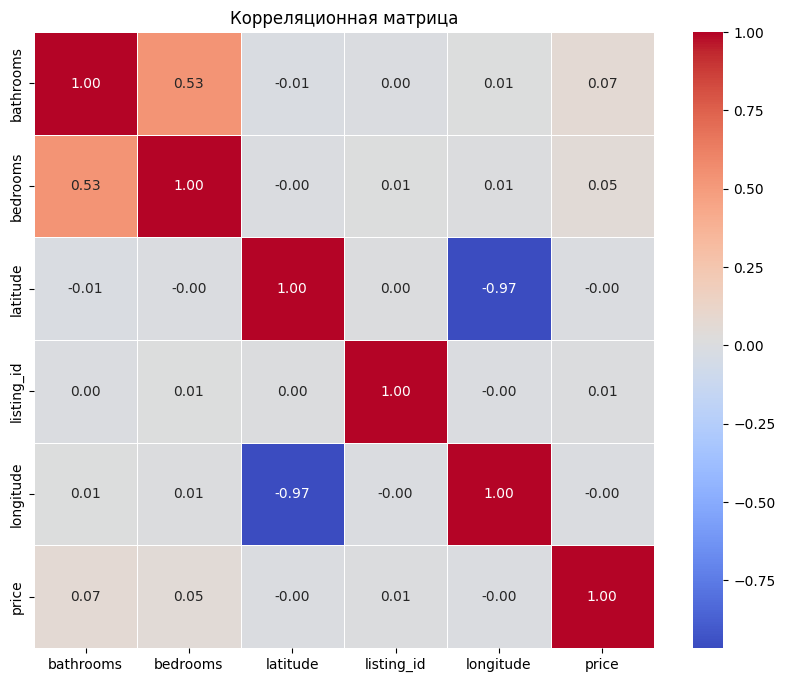

In [ ]:
def heat_map(coor_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Корреляционная матрица")
    plt.show()

heat_map(corr_matrix)

В датасете представлено шесть числовых столбцов.
В целом между ними наблюдается слабая корреляция.
Лишь между ценой и количеством спален прослеживается заметная взаимосвязь — чем больше спален, тем выше цена.

Также выявлена высокая корреляция между долготой и широтой, но она обусловлена тем, что все объекты недвижимости находятся в пределах одного города — Нью-Йорка.

## 2f. Создайте кадр данных, содержащий только эти столбцы 'bathrooms', 'bedrooms', 'interest_level'

In [ ]:
explore_columns = ['bathrooms', 'bedrooms', 'interest_level', 'price']
explore_df = rental_df[explore_columns]
explore_df.head(2)

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800


# Раздел №3. Анализ статистических данных

## 3a. Базовые знания по статистике

#### Определения:

- **Среднее значение (mean):** арифметическая сумма значений, делённая на их количество.
- **Медиана (median):** центральное значение в отсортированном ряду.
- **Мода (mode):** самое частое значение в выборке.
- **Дисперсия (variance):** средний квадрат отклонения от среднего — измеряет разброс данных.

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$

- **Стандартное отклонение (std):** корень из дисперсии — тоже показывает разброс, но в тех же единицах, что и данные.

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

#### Распределения

Краткая информация про основные виды распределений ниже:

---

###### Дискретное равномерное распределение

$$
P(X = x) = \frac{1}{n}, \quad x \in \{x_1, x_2, ..., x_n\}
$$

* **Пример:** Подбрасывание честной игральной кости.

---

###### Распределение Бернулли

$$
P(X = 1) = p, \quad P(X = 0) = 1 - p
$$

* Одно испытание, два исхода.
* **Пример:** Успех или неудача при отправке письма.

---

###### Биномиальное распределение

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
$$

* Кол-во успехов в $n$ испытаниях.
* **Пример:** Сколько из 10 покупателей совершат покупку при вероятности 0.2.

---

###### Распределение Пуассона

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

* Счёт событий во времени/пространстве.
* **Пример:** Кол-во вызовов в кол-центр за час.

---

###### Нормальное распределение (Гауссово)

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x - \mu)^2}{2\sigma^2}}
$$

* Симметрично, «колокол».
* **Пример:** Рост, IQ, ошибка измерений.

---

###### Экспоненциальное распределение

$$
f(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

* Время между случайными событиями.
* **Пример:** Время до следующего отказа оборудования.

---

#### Дополнительная информация

- **Выбросы (outliers):** Значения, сильно отличающиеся от остальных.

    Часто определяются через межквартильный размах (IQR):

$$
\text{IQR} = Q_3 - Q_1, \quad \text{Выбросы: } x < Q_1 - 1.5 \cdot IQR \text{ или } x > Q_3 + 1.5 \cdot IQR
$$

- **Перцентили:** значение, ниже которого лежит определённый процент данных (например, 25-й, 50-й, 75-й).
- **Доверительный интервал:** Диапазон, в котором с заданной вероятностью находится истинное значение параметра.

## 3b. Просмотреть статью

✅ [link](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf/)

## 3c. Анализ цели

### 3ci. Постройте гистограмму, чтобы понять распределение цели. Все ли ясно?

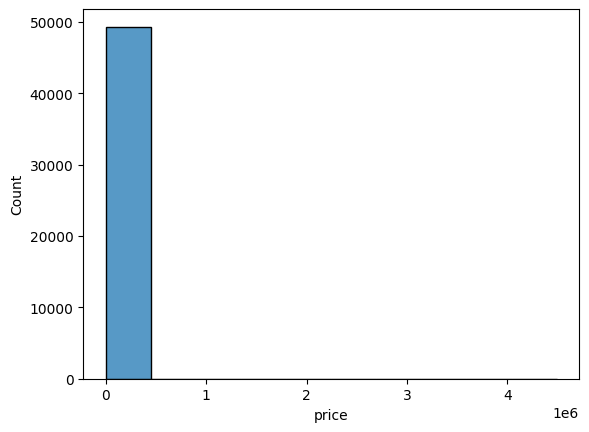

In [ ]:
sns.histplot(data=explore_df, x='price', bins=10);

Данная гистограмма не позволяет понять распределение целевого признака

### 3cii. Следующий шаг - `boxplot()`. Что вы можете сказать о цели? Есть ли какие-нибудь выбросы?

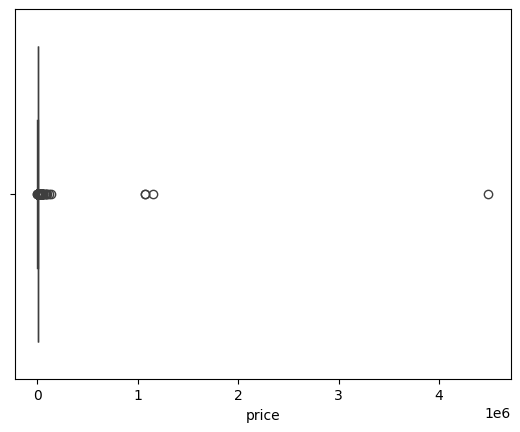

In [ ]:
sns.boxplot(data=explore_df, x='price');

Имеются сильные выбросы у цели

### 3ciii. Отбросьте строки, которые находятся за пределами 1 и 99 процентилей, из целевого столбца.

In [ ]:
def quantile(df, target, lb=0.01, ub=0.99):
    lower_percentile = df[target].quantile(lb)
    upper_percentile = df[target].quantile(ub)
    print(f'Нижняя граница: {lower_percentile}\Верхняя граница: {upper_percentile}')
    return df[(df[target] >= lower_percentile) & (df[target] <= upper_percentile)]

explore_df = quantile(explore_df, 'price')
explore_df.describe()

Нижняя граница: 1475.0\Верхняя граница: 13000.0


,bathrooms,bedrooms,price
count,48379.000000,48379.000000,48379.000000
mean,1.195198,1.534633,3538.636888
std,0.456495,1.101477,1597.663167
min,0.000000,0.000000,1475.000000
25%,1.000000,1.000000,2500.000000
50%,1.000000,1.000000,3150.000000
75%,1.000000,2.000000,4065.000000
max,10.000000,8.000000,13000.000000


### 3civ. Постройте еще одну гистограмму для цены. Объясните результат.

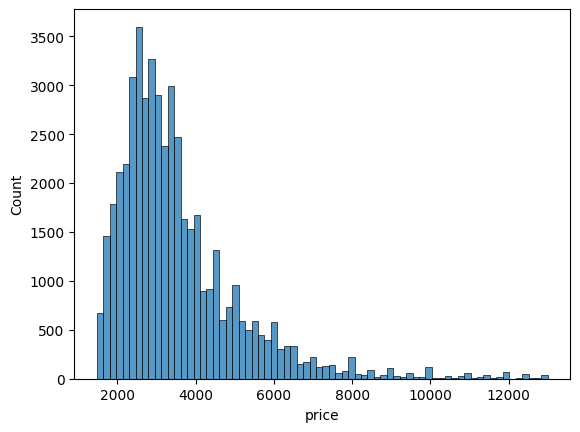

In [ ]:
sns.histplot(data=explore_df, x='price', bins=70);

## 3d. Анализ характеристик

### 3di. Каков тип столбца 'interest_level'?

In [ ]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48379 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48379 non-null  float64
 1   bedrooms        48379 non-null  int64  
 2   interest_level  48379 non-null  object 
 3   price           48379 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


`'interest_level'` имеет тип данных object (в виде строк)

### 3dii. Выведите значения в этом столбце. Сколько записей содержит каждое значение?

In [ ]:
explore_df['interest_level'].value_counts()

,count
interest_level,
low,33697
medium,11116
high,3566


В столбце 'interest_level' имеется три значения: **low**, **medium**, **high**, в которых соответственно *33_697*, *11_116*, *3_566* строк

### 3diii. Закодируйте эти значения. Например, вы можете заменить каждое значение на 0, 1 или 2

In [ ]:
explore_df['interest_level'] = explore_df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
explore_df.head(2)

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800


### 3div. Постройте гистограммы для признаков «ванные комнаты», «спальни». Есть ли выбросы?

Построим гистограмму для фичи "ванные комнаты" ('bathrooms')

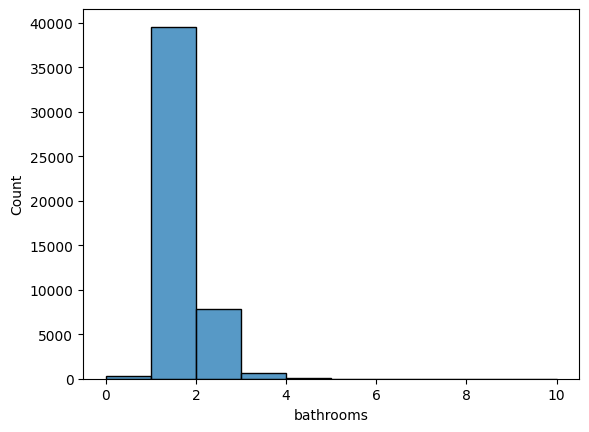

In [ ]:
sns.histplot(data=explore_df, x='bathrooms', bins=10);

Построим гистограмму для фичи "спальни" ('badrooms')

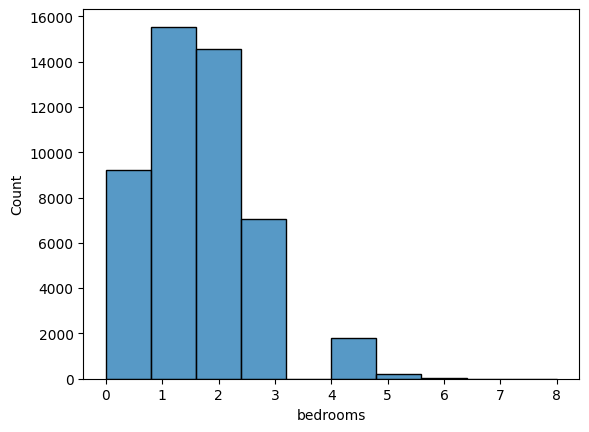

In [ ]:
sns.histplot(data=explore_df, x='bedrooms', bins=10);

## 3e. Комплексный анализ

### 3ei. Кореляционная матрица

Постройте корреляционную матрицу, чтобы понять взаимосвязь между признаками и целью. Постройте тепловую карту для корреляционной матрицы. Есть ли корреляция?

In [ ]:
corr_matrix = explore_df.corr()
corr_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517574,-0.063635,0.671943
bedrooms,0.517574,1.000000,0.050654,0.545948
interest_level,-0.063635,0.050654,1.000000,-0.200111
price,0.671943,0.545948,-0.200111,1.000000


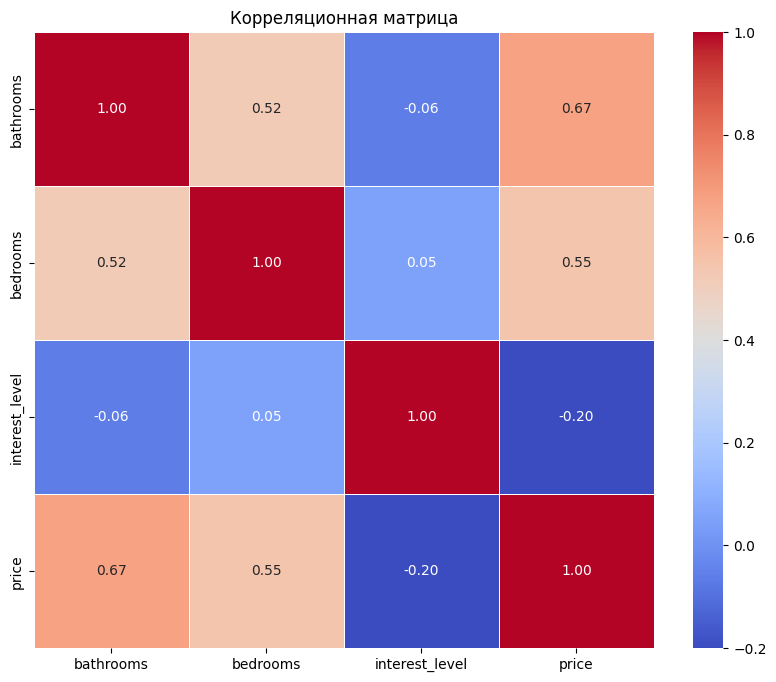

In [ ]:
heat_map(corr_matrix)

Сильная корреляция:

- 'price - bathrooms' --> 0.67
- 'price - bedrooms' --> 0.55



### 3eii. Диаграмма рассеяния

Постройте диаграмму рассеяния, чтобы визуализировать корреляцию между признаками и целью. Вы должны получить 3 графика, где ось X - цель, а ось Y - признак.

построим графики и отобразим коэффициент корреляции (коэффициент Пирсона)

In [ ]:
def scatter_kws_pearson(df, xx, yy):
    corr, _ = scipy.stats.pearsonr(df[xx], df[yy])
    sns.regplot(data=explore_df, x=xx, y=yy, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.title(f'{xx.capitalize()} vs. {yy.capitalize()} with Regression Line. Pearson = {corr}')

(X, Y) = ('price', 'bathrooms')

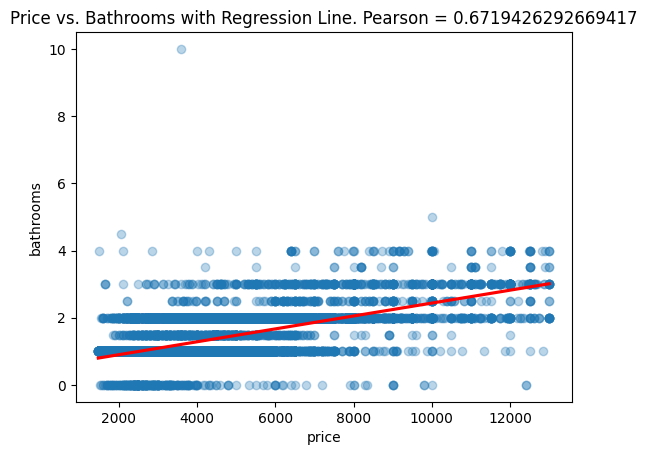

In [ ]:
scatter_kws_pearson(df=explore_df, xx='price', yy='bathrooms')

(X, Y) = ('price', 'bedrooms')

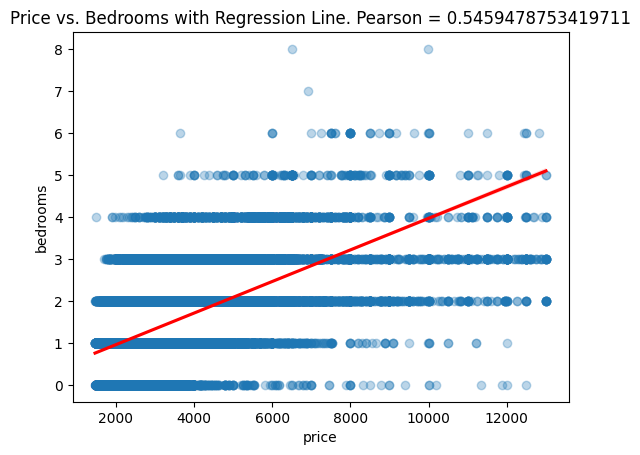

In [ ]:
scatter_kws_pearson(df=explore_df, xx='price', yy='bedrooms')

(X, Y) = ('price', 'interest_level')

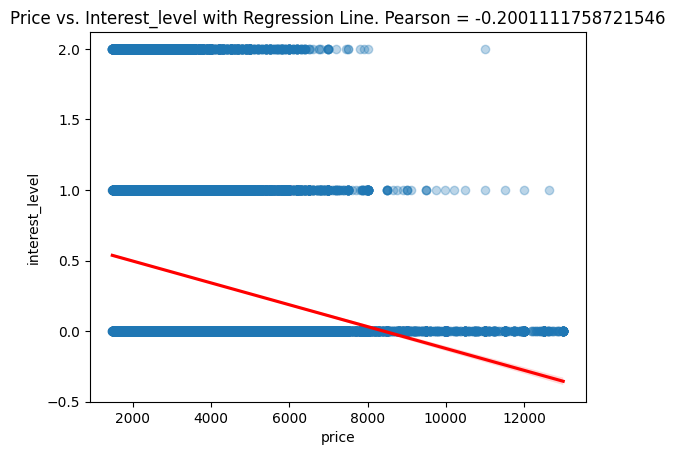

In [ ]:
scatter_kws_pearson(df=explore_df, xx='price', yy='interest_level')

# 4. Особенности создания

## 4a. Создание фичей.

Этот шаг очень широкий. Вы можете создать столько фичей, сколько захотите. *Например, можно добавить 3 новых квадратичных признака: „bathrooms_squared“, „bedrooms_squared“, „'interest_level_squared“.* П

остройте корреляционную матрицу с новыми признаками. Являются ли новые признаки более коррелированными с целью, чем базовые?

Создам фичу, которая работает с логарифмами, сглаживая

In [ ]:
finetune_df = explore_df.copy()
finetune_df['log_bathrooms'] = np.log1p(finetune_df['bathrooms'])
finetune_df['log_bedrooms'] = np.log1p(finetune_df['bedrooms'])
finetune_df['log_ratio'] = finetune_df['log_bathrooms'] - finetune_df['log_bedrooms']
finetune_df.head(2)

,bathrooms,bedrooms,interest_level,price,log_bathrooms,log_bedrooms,log_ratio
4,1.0,1,1,2400,0.693147,0.693147,0.000000
6,1.0,2,0,3800,0.693147,1.098612,-0.405465


И категориальный признак кол-ва ванных комнат

In [ ]:
def cond(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    else:
        return 3

finetune_df['bathrooms_cat'] = finetune_df['bathrooms'].apply(cond)

Проверка датасета, после добавления новых фичей и построение корреляционной матрицы

In [ ]:
finetune_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48379 entries, 4 to 124009
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48379 non-null  float64
 1   bedrooms        48379 non-null  int64  
 2   interest_level  48379 non-null  int64  
 3   price           48379 non-null  int64  
 4   log_bathrooms   48379 non-null  float64
 5   log_bedrooms    48379 non-null  float64
 6   log_ratio       48379 non-null  float64
 7   bathrooms_cat   48379 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 3.3 MB


In [ ]:
finetune_df.describe()

,bathrooms,bedrooms,interest_level,price,log_bathrooms,log_bedrooms,log_ratio,bathrooms_cat
count,48379.000000,48379.000000,48379.000000,48379.000000,48379.000000,48379.000000,48379.000000,48379.000000
mean,1.195198,1.534633,0.377188,3538.636888,0.768425,0.823980,-0.055555,1.191591
std,0.456495,1.101477,0.618340,1597.663167,0.181522,0.481012,0.430707,0.399810
min,0.000000,0.000000,0.000000,1475.000000,0.000000,0.000000,-1.609438,1.000000
25%,1.000000,1.000000,0.000000,2500.000000,0.693147,0.693147,-0.405465,1.000000
50%,1.000000,1.000000,0.000000,3150.000000,0.693147,0.693147,0.000000,1.000000
75%,1.000000,2.000000,1.000000,4065.000000,0.693147,1.098612,0.000000,1.000000
max,10.000000,8.000000,2.000000,13000.000000,2.397895,2.197225,1.609438,3.000000


In [ ]:
corr_matrix = finetune_df.corr()
corr_matrix

,bathrooms,bedrooms,interest_level,price,log_bathrooms,log_bedrooms,log_ratio,bathrooms_cat
bathrooms,1.000000,0.517574,-0.063635,0.671943,0.985989,0.451918,-0.089154,0.938577
bedrooms,0.517574,1.000000,0.050654,0.545948,0.511700,0.966686,-0.863935,0.524130
interest_level,-0.063635,0.050654,1.000000,-0.200111,-0.054321,0.042602,-0.070472,-0.072589
price,0.671943,0.545948,-0.200111,1.000000,0.646388,0.504546,-0.291054,0.643078
log_bathrooms,0.985989,0.511700,-0.054321,0.646388,1.000000,0.451325,-0.082587,0.928795
log_bedrooms,0.451918,0.966686,0.042602,0.504546,0.451325,1.000000,-0.926585,0.462218
log_ratio,-0.089154,-0.863935,-0.070472,-0.291054,-0.082587,-0.926585,1.000000,-0.124761
bathrooms_cat,0.938577,0.524130,-0.072589,0.643078,0.928795,0.462218,-0.124761,1.000000


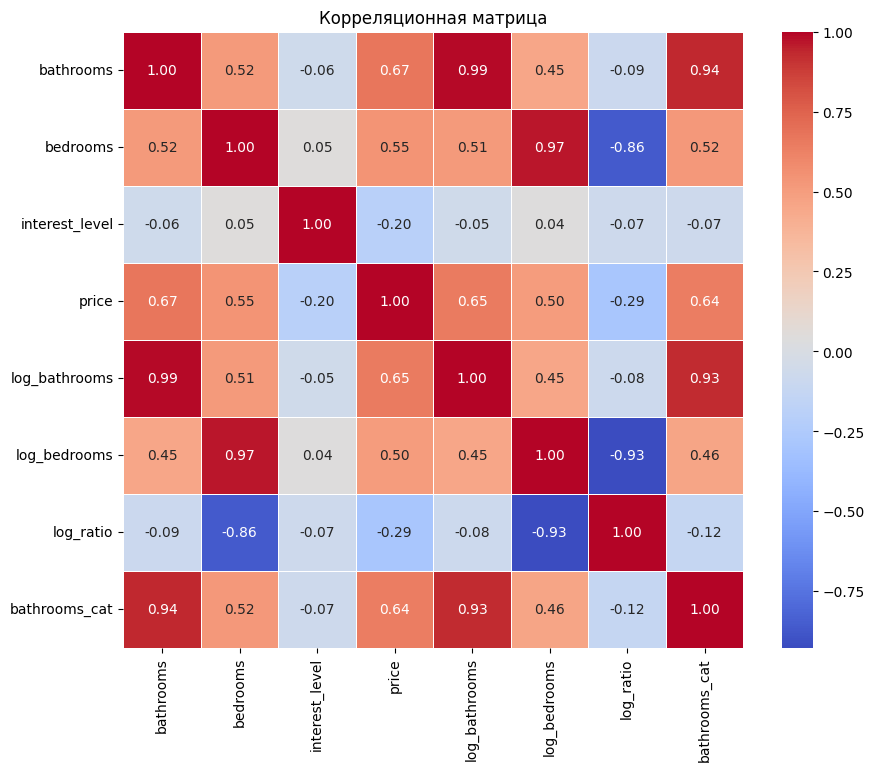

In [ ]:
heat_map(corr_matrix)

**Выводы:**

- **`log_bathrooms` и `log_bedrooms`**: сохраняют основную информацию, но сглаживают экстремальные значения → хороши для линейных моделей.
- **`log_ratio`**: интересно отражает дисбаланс ванной/спальни → может помочь выявить «странные» объекты (например, 4 спальни и 1 ванная).
- **`bathrooms_cat`**: мощная категоризация — очень близка по силе к `bathrooms`, но проще и может лучше работать в некоторых моделях (особенно деревьях).




## 4b. Информация про обучение

Для обучения модели здесь мы не будем использовать ваши новые признаки. Запомните этот пример и используйте его в лекции 2. Для обучения модели мы будем рассматривать только признаки «ванные комнаты» и «спальни».

## 4c. Прочитайте это [Sklearn info about PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

✅ Прочел

## 4d Загрузка тестового датасета

Чтобы использовать PolynomialFeatures, нам сначала нужно разделить данные на обучающие и тестовые выборки. Мы уже сделали это за вас, пожалуйста, ознакомьтесь с тренировочными и тестовыми данными.

In [ ]:
train_df = explore_df  # возьмем без наших ручных фич
test_df = pd.read_json('/content/drive/MyDrive/s21_ML_1/test.json')
test_df = test_df[['bathrooms', 'bedrooms', 'price']]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  74659 non-null  float64
 1   bedrooms   74659 non-null  int64  
 2   price      74659 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [ ]:
test_df.describe()

,bathrooms,bedrooms,price
count,74659.000000,74659.000000,7.465900e+04
mean,1.212915,1.544663,3.749033e+03
std,0.649820,1.107014,9.713092e+03
min,0.000000,0.000000,1.000000e+00
25%,1.000000,1.000000,2.495000e+03
50%,1.000000,1.000000,3.150000e+03
75%,1.000000,2.000000,4.100000e+03
max,112.000000,7.000000,1.675000e+06


После загрузки, нужно проверить тестовый датасет на выбросы

Начнем с проверки таргета

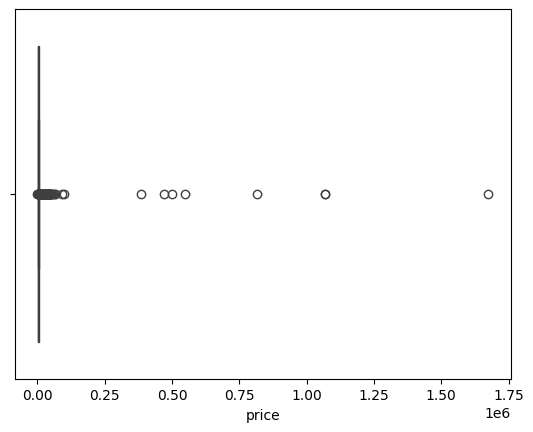

In [ ]:
sns.boxplot(data=test_df, x='price');

Имеются выбросы, нужно избавиться от них

In [ ]:
test_df = quantile(test_df, 'price')
test_df.describe()

Нижняя граница: 1495.0\Верхняя граница: 13000.0


,bathrooms,bedrooms,price
count,73216.000000,73216.000000,73216.000000
mean,1.196193,1.536700,3532.189262
std,0.617745,1.091494,1590.100768
min,0.000000,0.000000,1495.000000
25%,1.000000,1.000000,2500.000000
50%,1.000000,1.000000,3150.000000
75%,1.000000,2.000000,4090.000000
max,112.000000,7.000000,13000.000000


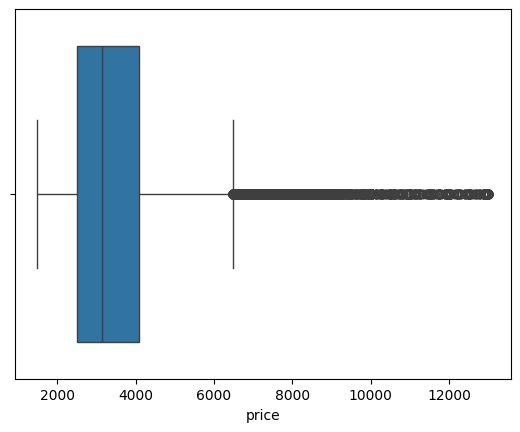

In [ ]:
sns.boxplot(data=test_df, x='price');

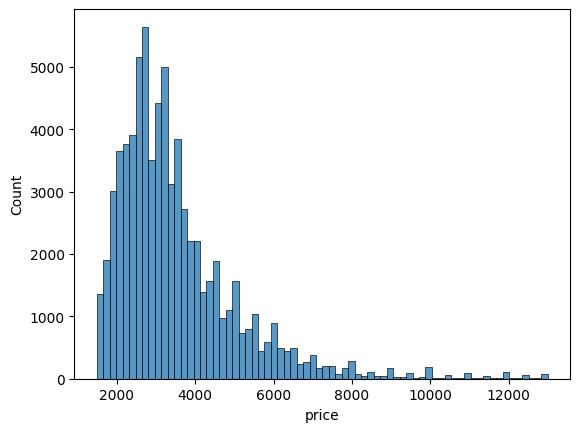

In [ ]:
sns.histplot(data=test_df, x='price', bins=70);

Выглядит уже довольно хорошо. Можем начинать процесс дальше.

Подготовим данные и разделим фичи от таргета

In [ ]:
feautures = ['bedrooms', 'bathrooms']

X_train = train_df[feautures]
y_train = train_df['price']

X_test = test_df[feautures]
y_test = test_df['price']

## 4e. Инициализируем PolynomialFeatures() со степенью 10

In [ ]:
feauture_tuning = PolynomialFeatures(degree=10)

## 4f. Примените PolynomialFeatures() для подгонки и преобразования тренировочных и тестовых данных

In [ ]:
feauture_tuning.fit(X_train)
X_train = feauture_tuning.transform(X_train)
print(f'Train shape = {X_train.shape}')
X_test = feauture_tuning.transform(X_test)
print(f'Test shape = {X_test.shape}')

Train shape = (48379, 66)
Test shape = (73216, 66)


# 5. Теперь вам нужно обучить 3 модели: линейную регрессию, дерево решений и наивную модель.

## 5a. Таблица результатов

Нужно будет построить новую таблицу с результатами наших исследований

### 5ai. Создание таблиц

Создадим два пустых Pandas DataFrames со столбцами „model“, „train“, „test“. Назовем первую таблицу result_MAE, а вторую result_RMSE. Мы будем заполнять эти таблицы результатами моделей.

In [ ]:
result_MAE = pd.DataFrame(columns = ['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns = ['model', 'train', 'test'])

## 5b. Линейная регрессия

**Линейная регрессия** — это модель, которая предсказывает числовую цель как линейную комбинацию признаков:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

В sklearn используется так:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

**MAE (Mean Absolute Error)** — среднее абсолютное отклонение:

$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

**RMSE (Root Mean Squared Error)** — корень из средней квадратичной ошибки:

$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}
$$



### 5bi. Инициализируем линейную регрессию из **sklearn** без параметров.

In [ ]:
linear_regression_model = LinearRegression()

### 5bii. Подгоните модель и сделайте прогнозы для обучающих и тестовых признаков. Сохраните их как новые столбцы в данных.

In [ ]:
# Прогонка модели
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозы на train/test
y_pred_train = linear_regression_model.predict(X_train)
y_pred_test = linear_regression_model.predict(X_test)

### 5biii. Вычислите MAE (среднюю абсолютную ошибку) на обучающих и тестовых признаках.

Чтобы добавить значения ошибки, нужно ее грамотно посчитать, а именно реалищуем свою функцию MAE и RMSE

In [ ]:
def mean_absolute_error(y_test, y_pred_test):
    return np.mean(np.abs(y_test - y_pred_test))


mae = mean_absolute_error

In [ ]:
train_mae = mae(y_train, y_pred_train)
test_mae = mae(y_test, y_pred_test)

### 5biv. Вычислите RMSE (Root Mean Square Error) для тренировочных и тестовых целей.

In [ ]:
def root_mean_squared_error(y_test, y_pred_test):
    return np.sqrt(np.mean((y_test - y_pred_test) ** 2))


rmse = root_mean_squared_error

In [ ]:
train_rmse = rmse(y_train, y_pred_train)
test_rmse = rmse(y_test, y_pred_test)

### 5bv. Вставьте свои метрики в таблицы *result_MAE* и *result_RMSE* с именем модели „linear_regression“.

In [ ]:
print(f'Train MAE: {train_mae}\nTrain RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}\nTest RMSE: {test_rmse}')

Train MAE: 756.0402996825576
Train RMSE: 1077.5663556874467
Test MAE: 1.4774446884634532e+16
Test RMSE: 3.997737032344386e+18


Запишем в `DataFrame` всю информацию

In [ ]:
result_MAE.loc[len(result_MAE)] = ['linear_regression', train_mae, test_mae]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', train_rmse, test_rmse]

Проведем проверку данных

In [ ]:
result_MAE.head()

,model,train,test
0,linear_regression,756.0403,1.477445e+16


In [ ]:
result_RMSE.head()

,model,train,test
0,linear_regression,1077.566356,3.997737e+18


## 5c. Дерево решений

### 5ci. Инициализируем регрессор дерева решений из sklearn с фиксированным значением random_state=21

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=21)

### 5cii. Настройте его на обучающие признаки и обучающую цель и сделайте прогноз на обучающих и тестовых признаках. Сохраните его как новый столбец в данных.

In [ ]:
tree_regressor.fit(X_train, y_train)

# Прогнозы на train/test
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

### 5ciii. Вычислите MAE (среднюю абсолютную ошибку) для обучающей и тестовой целей.

In [ ]:
train_mae = mae(y_train, y_pred_train)
test_mae = mae(y_test, y_pred_test)

### 5civ. Вычислите RMSE (Root Mean Square Error) для обучающей и тестовой целей.

In [ ]:
train_rmse = rmse(y_train, y_pred_train)
test_rmse = rmse(y_test, y_pred_test)

### 5cv. Вставьте свои метрики в таблицы *result_MAE* и *result_RMSE* с именем модели „decision_tree“.

In [ ]:
print(f'Train MAE: {train_mae}\nTrain RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}\nTest RMSE: {test_rmse}')

Train MAE: 756.0447348104971
Train RMSE: 1077.4835964662536
Test MAE: 759.3625012389401
Test RMSE: 1081.2454524313234


In [ ]:
result_MAE.loc[len(result_MAE)] = ['decision_tree', train_mae, test_mae]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', train_rmse, test_rmse]

In [ ]:
result_MAE.head()

,model,train,test
0,linear_regression,756.040300,1.477445e+16
1,decision_tree,756.044735,7.593625e+02


In [ ]:
result_RMSE.head()

,model,train,test
0,linear_regression,1077.566356,3.997737e+18
1,decision_tree,1077.483596,1.081245e+03


## 5d. Наивные модели

### 5di. Вычислите среднее значение и медиану „price“ на обучающих и тестовых данных и создайте столбец с этими значениями.

In [ ]:
mean_train_pred = np.full_like(y_train, fill_value=y_train.mean())
mean_test_pred = np.full_like(y_test, fill_value=y_test.mean())

median_train_pred = np.full_like(y_train, fill_value=y_train.median())
median_test_pred = np.full_like(y_test, fill_value=y_test.median())

### 5dii. Рассчитайте MAE на учебных и тестовых данных между вашей целью и рассчитанными средним и медианой.

In [ ]:
mean_train_mae = mae(y_train, mean_train_pred)
mean_test_mae = mae(y_test, mean_test_pred)

median_train_mae = mae(y_train, median_train_pred)
median_test_mae = mae(y_test, median_test_pred)

### 5diii. Рассчитайте RMSE для тренировочных и тестовых целей между вашей целью и рассчитанными средним и медианой.

In [ ]:
mean_train_rmse = rmse(y_train, mean_train_pred)
mean_test_rmse = rmse(y_test, mean_test_pred)

median_train_rmse = rmse(y_train, median_train_pred)
median_test_rmse = rmse(y_test, median_test_pred)

### 5div. Вставьте свои метрики в таблицы result_MAE и result_RMSE с именами моделей „naive_mean“ и „naive_median“.

In [ ]:
result_MAE.loc[len(result_MAE)] = ['naive_mean', mean_train_mae, mean_test_mae]
result_RMSE.loc[len(result_RMSE)] = ['naive_mean', mean_train_rmse, mean_test_rmse]

result_MAE.loc[len(result_MAE)] = ['naive_median', median_train_mae, median_test_mae]
result_RMSE.loc[len(result_RMSE)] = ['naive_median', median_train_rmse, median_test_rmse]

In [ ]:
result_MAE.head()

,model,train,test
0,linear_regression,756.040300,1.477445e+16
1,decision_tree,756.044735,7.593625e+02
2,naive_mean,1139.022179,1.135578e+03
3,naive_median,1086.210505,1.084275e+03


In [ ]:
result_RMSE.head()

,model,train,test
0,linear_regression,1077.566356,3.997737e+18
1,decision_tree,1077.483596,1.081245e+03
2,naive_mean,1597.646782,1.590090e+03
3,naive_median,1644.236439,1.635376e+03


## 5e. 5. Сравните результаты


### 5ei. Распечатайте итоговые таблицы result_MAE и result_RMSE.

In [ ]:
result_MAE

,model,train,test
0,linear_regression,756.040300,1.477445e+16
1,decision_tree,756.044735,7.593625e+02
2,naive_mean,1139.022179,1.135578e+03
3,naive_median,1086.210505,1.084275e+03


In [ ]:
result_RMSE

,model,train,test
0,linear_regression,1077.566356,3.997737e+18
1,decision_tree,1077.483596,1.081245e+03
2,naive_mean,1597.646782,1.590090e+03
3,naive_median,1644.236439,1.635376e+03


### 5eii. Какая модель является лучшей?

Лучше и точнее всех себя проявляет модель **decision_tree**

In [ ]:
print('Bye :)')

Bye :)
